In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tnrange
from scipy.stats import sem, t
import os



In [2]:
true_imgs = np.load("/ssd/joon/2017_11_29_ns/images/test_images.npy")
dec_imgs = np.load("/ssd/joon/2017_11_29_ns/yass/decoded/yass_test_decoded.npy")
smooth_dec_imgs = np.load("/ssd/joon/2017_11_29_ns/yass/decoded/yass_smooth_test_decoded.npy")

In [18]:
pix_corr_array = np.empty((true_imgs.shape[1], 2))
img_corr_array = np.empty((true_imgs.shape[0], 2))
mse_array = np.empty((true_imgs.shape[0], 2))

for i in tnrange(true_imgs.shape[1]):
    pix_corr_array[i,0] = np.corrcoef(true_imgs[:,i], dec_imgs[:,i])[0][1]
    pix_corr_array[i,1] = np.corrcoef(true_imgs[:,i], smooth_dec_imgs[:,i])[0][1]

for i in tnrange(true_imgs.shape[0]):
    img_corr_array[i,0] = np.corrcoef(true_imgs[i,:], dec_imgs[i,:])[0][1]
    img_corr_array[i,1] = np.corrcoef(true_imgs[i,:], smooth_dec_imgs[i,:])[0][1]
    
for i in tnrange(true_imgs.shape[0]):
    mse_array[i,0] = np.sum((true_imgs[i,:] - dec_imgs[i,:])**2)/true_imgs.shape[1]
    mse_array[i,1] = np.sum((true_imgs[i,:] - smooth_dec_imgs[i,:])**2)/true_imgs.shape[1]
    
mean_pix_array = np.mean(pix_corr_array, axis=0)
pix_std_err = np.empty((pix_corr_array.shape[1],))
confidence = 0.99
for i in range(pix_std_err.shape[0]):
    pix_std_err[i] = sem(pix_corr_array[:,i]) * t.ppf((1 + confidence) / 2, pix_corr_array[:,i].shape[0] - 1)
    
mean_img_array = np.mean(img_corr_array, axis=0)
img_std_err = np.empty((img_corr_array.shape[1],))
confidence = 0.99
for i in range(img_std_err.shape[0]):
    img_std_err[i] = sem(img_corr_array[:,i]) * t.ppf((1 + confidence) / 2, img_corr_array[:,i].shape[0] - 1)
    
mean_mse_array = np.mean(mse_array, axis=0)
mse_std_err = np.empty((mse_array.shape[1]))
confidence = 0.99
for i in range(mse_std_err.shape[0]):
    mse_std_err[i] = sem(mse_array[:,i]) * t.ppf((1 + confidence) / 2, mse_array[:,i].shape[0] - 1)

Text(0.5, 1.0, 'PER PIXEL Test Corr versus TRUE Images')

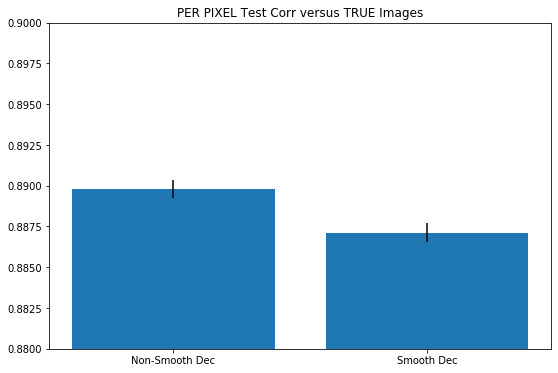

In [13]:
plt.figure(figsize = (9,6))
bar_names = ["Non-Smooth Dec", "Smooth Dec"]
plt.bar(np.arange(mean_pix_array.shape[0]), mean_pix_array, yerr=pix_std_err, tick_label = bar_names)
plt.ylim(0.88,0.9)
plt.title("PER PIXEL Test Corr versus TRUE Images")

(0.5, 1)

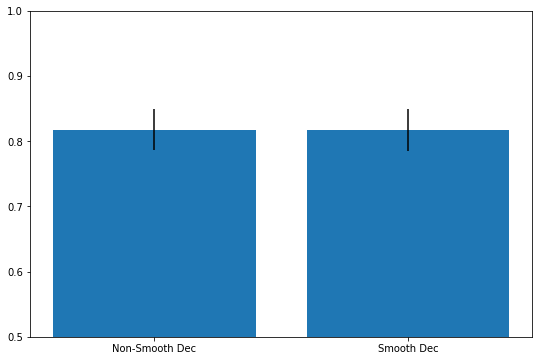

In [16]:
plt.figure(figsize = (9,6))
bar_names = ["Non-Smooth Dec", "Smooth Dec"]
plt.bar(np.arange(mean_img_array.shape[0]), mean_img_array, yerr=img_std_err, tick_label = bar_names)
plt.ylim(0.5,1)

<BarContainer object of 2 artists>

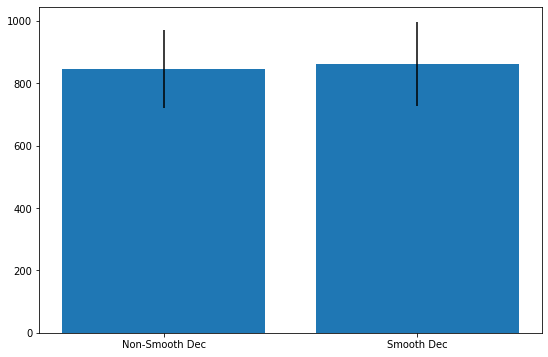

In [19]:
plt.figure(figsize = (9,6))
bar_names = ["Non-Smooth Dec", "Smooth Dec"]
plt.bar(np.arange(mean_mse_array.shape[0]), mean_mse_array, yerr=mse_std_err, tick_label = bar_names)
#plt.ylim(0.5,1)

In [31]:
def indiv_smooth_nonsmooth_compare(true, smooth_true, dec, smooth_dec):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,7))
    
    vmin = min(np.min(true), np.min(smooth_true), np.min(dec), np.min(smooth_dec))
    vmax = max(np.max(true), np.max(smooth_true), np.max(dec), np.max(smooth_dec))
    
    corr = np.corrcoef(true, dec)[0][1]
    smooth_corr = np.corrcoef(true, smooth_dec)[0][1]
    
    axs[0,0].imshow(true.reshape((95,146)), vmin=vmin, vmax=vmax, cmap = "Greys_r")
    axs[0,1].imshow(smooth_true.reshape((95,146)), vmin=vmin, vmax=vmax, cmap = "Greys_r")
    axs[1,0].imshow(dec.reshape((95,146)), vmin=vmin, vmax=vmax, cmap = "Greys_r")
    axs[1,1].imshow(smooth_dec.reshape((95,146)), vmin=vmin, vmax=vmax, cmap = "Greys_r")
    
    axs[0,0].set_title("True")
    axs[0,1].set_title("Smooth True")
    axs[1,0].set_title("Dec "+str(round(corr, 4)))
    axs[1,1].set_title("Smooth Dec "+str(round(smooth_corr, 4)))
    
    axs[0,0].axis("off")
    axs[0,1].axis("off")
    axs[1,0].axis("off")
    axs[1,1].axis("off")
    
    fig.tight_layout()
    
def multi_smooth_nonsmooth_compare(true_file, smooth_file, dec_file, smooth_dec_file, save_dir):
    true_imgs = np.load(true_file)
    smooth_imgs = np.load(smooth_file)
    dec_imgs = np.load(dec_file)
    smooth_dec_imgs = np.load(smooth_dec_file)
    
    with PdfPages(os.path.join(save_dir, "smooth_nonsmooth_comparison.pdf")) as pdf:
        for i in tnrange(0,100):
            true = true_imgs[i,:]
            smooth_true = smooth_imgs[i,:]
            dec = dec_imgs[i,:]
            smooth_dec = smooth_dec_imgs[i,:]
            
            fig = indiv_smooth_nonsmooth_compare(true, smooth_true, dec, smooth_dec)
            pdf.savefig(fig)
            plt.close()

In [32]:
true_file = "/ssd/joon/2017_11_29_ns/images/test_images.npy"
smooth_file = "/ssd/joon/2017_11_29_ns/images/smooth_test_images.npy"
dec_file = "/ssd/joon/2017_11_29_ns/yass/decoded/yass_test_decoded.npy"
smooth_dec_file = "/ssd/joon/2017_11_29_ns/yass/decoded/yass_smooth_test_decoded.npy"
save_dir = "/ssd/joon/2017_11_29_ns/figures/"


multi_smooth_nonsmooth_compare(true_file, smooth_file, dec_file, smooth_dec_file, save_dir)